In [1]:
import matplotlib.pyplot as plt
from scipy.stats import entropy
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import math
import tensorflow as tf
import seaborn as sns
import pandas as pd
import numpy as np
import sys
import os

In [50]:
df = pd.read_csv('master.csv', index_col=None, header=0)
df

,id,asn_peer_particpiants,name_peer_particpiants,aka_peer_particpiants,website_peer_particpiants,notes_public_peer_particpiants,notes_private_peer_particpiants,irr_as_set_peer_particpiants,info_traffic_peer_particpiants,info_ratio_peer_particpiants,...,name_peer_participants_contacts_y,telephone_peer_participants_contacts_y,email_peer_participants_contacts_y,participant_id_peer_participans_publics,public_id_peer_participans_publics,local_asn_peer_participans_publics,local_ipaddr_peer_participans_publics,speed_peer_participans_publics,protocol_peer_participans_publics,pending_peer_participans_publics
0,1,4436.0,GTT Communications (AS4436),Formerly known as nLayer Communications,http://www.gtt.net,We are no longer accepting Peering requests fo...,*** We are in the process of integrating AS443...,AS-GTT-AS4436,1 Tbps+,Mostly Outbound,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,20940.0,Akamai Technologies,32787,http://www.akamai.com/,AS 32787 has been acquired by AS 20940. Routin...,NaN,AS-AKAMAI,1 Tbps+,Heavy Outbound,...,Peering,NaN,peering@gtt.net,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,31800.0,DALnet IRC Network,NaN,http://www.dal.net,NaN,NaN,AS31800,100-1000Mbps,Heavy Inbound,...,DALnet Peering,INOC-31800,peering@dal.net,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,22822.0,Limelight Networks,llnw.net,http://www.limelightnetworks.com/,NaN,NaN,AS-LLNW,1 Tbps+,Mostly Outbound,...,DALnet Routing,INOC-31800,routing@dal.net,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,3303.0,Swisscom,IP-Plus,http://www.ip-plus.net,NaN,NaN,AS-SWCMGLOBAL,500-1000 Gbps,Mostly Inbound,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32252,35067,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,9791.0,597.0,37153.0,196.10.140.21,1000.0,IPv4,0.0
32253,35068,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2927.0,142.0,43531.0,2001:504:13::211:11,10000.0,IPv4,0.0
32254,35069,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,6460.0,909.0,2635.0,103.231.152.81,10000.0,IPv4,0.0
32255,35070,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,6460.0,909.0,2635.0,2001:df5:b800:bb00::2635:1,10000.0,IPv4,0.0


In [51]:
#file = df.apply(pd.to_numeric, errors='coerce').replace([np.nan, np.inf, -np.inf], 0).clip(lower=0)

In [52]:
#how many unique AS's are there? 
len(df['asn_peer_particpiants'].unique())


5886

In [53]:
#CDF of ip refixes for content, Non-profit and NSP. 

In [63]:
df = df.replace([np.nan], 0)
df

,id,asn_peer_particpiants,name_peer_particpiants,aka_peer_particpiants,website_peer_particpiants,notes_public_peer_particpiants,notes_private_peer_particpiants,irr_as_set_peer_particpiants,info_traffic_peer_particpiants,info_ratio_peer_particpiants,...,name_peer_participants_contacts_y,telephone_peer_participants_contacts_y,email_peer_participants_contacts_y,participant_id_peer_participans_publics,public_id_peer_participans_publics,local_asn_peer_participans_publics,local_ipaddr_peer_participans_publics,speed_peer_participans_publics,protocol_peer_participans_publics,pending_peer_participans_publics
0,1,4436.0,GTT Communications (AS4436),Formerly known as nLayer Communications,http://www.gtt.net,We are no longer accepting Peering requests fo...,*** We are in the process of integrating AS443...,AS-GTT-AS4436,1 Tbps+,Mostly Outbound,...,0,0,0,0.0,0.0,0.0,0,0.0,0,0.0
1,2,20940.0,Akamai Technologies,32787,http://www.akamai.com/,AS 32787 has been acquired by AS 20940. Routin...,0,AS-AKAMAI,1 Tbps+,Heavy Outbound,...,Peering,0,peering@gtt.net,0.0,0.0,0.0,0,0.0,0,0.0
2,3,31800.0,DALnet IRC Network,0,http://www.dal.net,0,0,AS31800,100-1000Mbps,Heavy Inbound,...,DALnet Peering,INOC-31800,peering@dal.net,0.0,0.0,0.0,0,0.0,0,0.0
3,4,22822.0,Limelight Networks,llnw.net,http://www.limelightnetworks.com/,0,0,AS-LLNW,1 Tbps+,Mostly Outbound,...,DALnet Routing,INOC-31800,routing@dal.net,0.0,0.0,0.0,0,0.0,0,0.0
4,5,3303.0,Swisscom,IP-Plus,http://www.ip-plus.net,0,0,AS-SWCMGLOBAL,500-1000 Gbps,Mostly Inbound,...,0,0,0,0.0,0.0,0.0,0,0.0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32252,35067,0.0,0,0,0,0,0,0,0,0,...,0,0,0,9791.0,597.0,37153.0,196.10.140.21,1000.0,IPv4,0.0
32253,35068,0.0,0,0,0,0,0,0,0,0,...,0,0,0,2927.0,142.0,43531.0,2001:504:13::211:11,10000.0,IPv4,0.0
32254,35069,0.0,0,0,0,0,0,0,0,0,...,0,0,0,6460.0,909.0,2635.0,103.231.152.81,10000.0,IPv4,0.0
32255,35070,0.0,0,0,0,0,0,0,0,0,...,0,0,0,6460.0,909.0,2635.0,2001:df5:b800:bb00::2635:1,10000.0,IPv4,0.0


In [64]:
df_content = df.loc[df['info_type_peer_particpiants'] == 'Content']
df_non_profit = df.loc[df['info_type_peer_particpiants'] == 'Non-Profit']
df_nsp = df.loc[df['info_type_peer_particpiants'] == 'NSP']

In [65]:
df_nsp = df_nsp['info_prefixes_peer_particpiants']
df_non_profit = df_non_profit['info_prefixes_peer_particpiants']
df_content = df_content['info_prefixes_peer_particpiants']

In [66]:
df_nsp

0        11000.0
7          500.0
9       260000.0
11           0.0
12      165000.0
          ...   
5964        10.0
5965         0.0
5985         0.0
6012         3.0
6017         0.0
Name: info_prefixes_peer_particpiants, Length: 1734, dtype: float64

C:\Users\DREADBORN\Anaconda3\lib\site-packages\pandas\core\series.py:853: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Text(0.5, 1.0, 'Distribution of Ip prefixes for content, nonprofit and NSP')

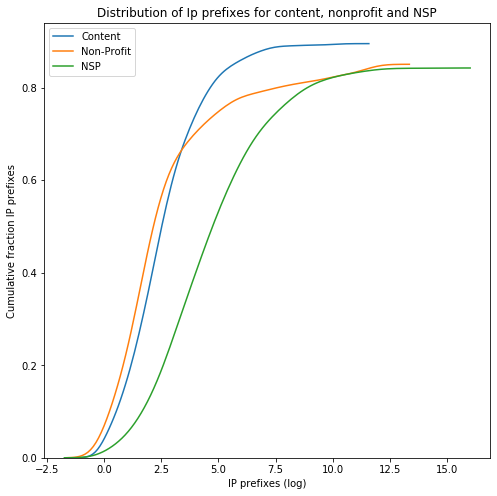

In [68]:
f, ax =plt.subplots(figsize=(8, 8))
#np.log
ax = sns.kdeplot(np.log(df_content), label = "Content", cumulative=True)
ax = sns.kdeplot(np.log(df_non_profit), label = "Non-Profit", cumulative=True)
ax = sns.kdeplot(np.log(df_nsp), label = "NSP", cumulative=True)
ax.legend()
plt.xlabel('IP prefixes (log)')
plt.ylabel('Cumulative fraction IP prefixes')
plt.title('Distribution of Ip prefixes for content, nonprofit and NSP')